In [33]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import time,random

In [34]:
# Carga de datos
df = pd.read_excel('C:/Users/Asus/Escritorio/Universidad/Nivel 12/TESIS/series_tiempo.xlsx')
df

,mesindexacion,mesindexacion2,añoindexacion,licitacion,generadora,tipobloque,bloque,decpnudo,tipodecreto,mesreferencia,...,indice_CARBÓN,indice_CARBÓN_6M,indice_CPI,indice_CPI_4M,indice_CPI_6M,indice_CPI_9M,indice_GNL,indice_GNL_4M,indice_GNL_6M,unique_id
0,2010-01-01,1,2010,CGED 2008/01,CAMPANARIO,BB,BS1,130/2008,Decreto PN,1,...,0,0,0,0,0,1,0,0,0,ID_CGED 2008/01_CAMPANARIO_BS1_BB
1,2010-01-01,1,2010,CGED 2008/01,CAMPANARIO,BV,BS1,130/2008,Decreto PN,1,...,0,0,0,0,0,1,0,0,0,ID_CGED 2008/01_CAMPANARIO_BS1_BV
2,2010-01-01,1,2010,CGED 2008/01,COLBÚN,BB,BS1,130/2008,Decreto PN,1,...,0,0,0,0,0,1,0,0,0,ID_CGED 2008/01_COLBÚN_BS1_BB
3,2010-01-01,1,2010,CGED 2008/01,COLBÚN,BV,BS1,130/2008,Decreto PN,1,...,0,0,0,0,0,1,0,0,0,ID_CGED 2008/01_COLBÚN_BS1_BV
4,2010-01-01,1,2010,CGED 2008/01,ENDESA,BB,BS2,130/2008,Decreto PN,1,...,0,0,0,0,0,1,0,0,0,ID_CGED 2008/01_ENDESA_BS2_BB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,2022-12-01,12,2022,SIC 2013/03_2 (ENELSA),SAN JUAN SPA.,BB,BS2A,4T/2013,Decreto PN,12,...,0,0,0,0,1,0,0,0,0,ID_SIC 2013/03_2 (ENELSA)_SAN JUAN SPA._BS2A_BB
16091,2022-12-01,12,2022,SIC 2013/03_2 (ENELSA),SAN JUAN SPA.,BB,BS2C,4T/2013,Decreto PN,12,...,0,0,0,0,1,0,0,0,0,ID_SIC 2013/03_2 (ENELSA)_SAN JUAN SPA._BS2C_BB
16092,2022-12-01,12,2022,SIC 2013/03_2 (ENELSA),SAN JUAN SPA.,BB,BS3,4T/2013,Decreto PN,12,...,0,0,0,0,1,0,0,0,0,ID_SIC 2013/03_2 (ENELSA)_SAN JUAN SPA._BS3_BB
16093,2022-12-01,12,2022,SIC 2013/03_2 (ENELSA),SANTIAGO SOLAR S.A.,BB,BS2B,4T/2013,Decreto PN,12,...,0,0,0,0,1,0,0,0,0,ID_SIC 2013/03_2 (ENELSA)_SANTIAGO SOLAR S.A._...


In [35]:
df = df[df['unique_id'] == 'ID_EMEL-SIC 2006/01-2 (EMETAL)_AES GENER_BB_Sur_BB']

In [36]:
# Lista de nombres de las variables que quieres eliminar
variables_a_eliminar = ['licitacion',
       'generadora', 'tipobloque', 'bloque', 'decpnudo', 'tipodecreto',
       'mesreferencia', 'ptooferta', 'valorbase',
       'precioenergiabase',
       'añoreferencia', 'añobase', 'mesbase', 'rezago_2.0',
       'rezago_3.0', 'indice_BRENT_6M', 'indice_CARBÓN', 'indice_CARBÓN_6M',
       'indice_CPI', 'indice_CPI_4M', 'indice_CPI_6M', 'indice_CPI_9M',
       'indice_GNL', 'indice_GNL_4M', 'indice_GNL_6M','unique_id']

In [37]:
df.drop(variables_a_eliminar, axis=1, inplace=True)
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_12336\829567979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(variables_a_eliminar, axis=1, inplace=True)


,mesindexacion,mesindexacion2,añoindexacion,precioindexadoponderado,valoractual,factorindexacion,añoactual,mesactual
17,2010-01-01,1,2010,70.433561,91.14,1.341873,2009,11
35,2010-02-01,2,2010,73.424321,95.01,1.398852,2009,12
53,2010-03-01,3,2010,77.296080,100.02,1.472615,2010,1
71,2010-04-01,4,2010,79.467666,102.83,1.513987,2010,2
89,2010-05-01,5,2010,81.299217,105.20,1.548881,2010,3
...,...,...,...,...,...,...,...,...
15196,2022-08-01,8,2022,269.887124,349.23,5.141784,2022,6
15393,2022-09-01,9,2022,266.973645,345.46,5.086278,2022,7
15590,2022-10-01,10,2022,247.182077,319.85,4.709217,2022,8
15787,2022-11-01,11,2022,272.035525,352.01,5.182715,2022,9


In [38]:
df=df.drop(['mesindexacion2', 'añoindexacion', 'añoactual','mesactual'], axis=1)
df

,mesindexacion,precioindexadoponderado,valoractual,factorindexacion
17,2010-01-01,70.433561,91.14,1.341873
35,2010-02-01,73.424321,95.01,1.398852
53,2010-03-01,77.296080,100.02,1.472615
71,2010-04-01,79.467666,102.83,1.513987
89,2010-05-01,81.299217,105.20,1.548881
...,...,...,...,...
15196,2022-08-01,269.887124,349.23,5.141784
15393,2022-09-01,266.973645,345.46,5.086278
15590,2022-10-01,247.182077,319.85,4.709217
15787,2022-11-01,272.035525,352.01,5.182715


In [39]:
df.set_index('mesindexacion', inplace=True)
df

,precioindexadoponderado,valoractual,factorindexacion
mesindexacion,,,
2010-01-01,70.433561,91.14,1.341873
2010-02-01,73.424321,95.01,1.398852
2010-03-01,77.296080,100.02,1.472615
2010-04-01,79.467666,102.83,1.513987
2010-05-01,81.299217,105.20,1.548881
...,...,...,...
2022-08-01,269.887124,349.23,5.141784
2022-09-01,266.973645,345.46,5.086278
2022-10-01,247.182077,319.85,4.709217


In [40]:
# Dividir los datos en características (X) y la variable objetivo (y)

X = df[['valoractual', 'factorindexacion']]
y = df['precioindexadoponderado']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Calcular la matriz de correlación de Pearson

corr_matrix = X.corr().abs()

# Filtrar las correlaciones mayores a 0.75
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

print("Correlación de Pearson:\nLas siguientes características están altamente correlacionadas (>0.75):", to_drop, "\n")

Correlación de Pearson:
Las siguientes características están altamente correlacionadas (>0.75): ['factorindexacion'] 



In [42]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestRegressor
# 4. Importancia de la Característica del Árbol de Decisión
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
print("Importancia de la Característica del Árbol de Decisión:\n", feature_importance.nlargest(4, 'Importance'), "\n")

Importancia de la Característica del Árbol de Decisión:
             Feature  Importance
1  factorindexacion     0.60334
0       valoractual     0.39666 



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Seleccion de caracteristicas
features =df.columns

#Se define escalado
std_scaler = StandardScaler()
min_scaler=MinMaxScaler()

#Transformacion

for i in features:
  df[i] = min_scaler.fit_transform(df[i].values.reshape(-1,1))

df.head()

,precioindexadoponderado,valoractual,factorindexacion
mesindexacion,,,
2010-01-01,0.074238,0.074238,0.074238
2010-02-01,0.086757,0.086757,0.086757
2010-03-01,0.102963,0.102963,0.102963
2010-04-01,0.112053,0.112053,0.112053
2010-05-01,0.119719,0.119719,0.119719


In [44]:
features = ['valoractual', 'factorindexacion']

In [45]:
#Se define escalado
std_scaler = StandardScaler()

series_time_scaled=[]

In [46]:
# Suponiendo que 'features' es una lista de características que se deben estandarizar

# Crear una instancia de StandardScaler
std_scaler = StandardScaler()

    
    # Iterar a través de cada característica en la lista 'features'
for nombre_caracteristica in features:
        # Extraer los valores de la característica actual y darle forma a (-1, 1)
    valores_caracteristica = df[nombre_caracteristica].values.reshape(-1, 1)
        
        # Aplicar la estandarización a los valores de la característica
    valores_estandarizados = std_scaler.fit_transform(valores_caracteristica)
        
        # Reemplazar los valores originales de la característica con los valores estandarizados en la serie
    df[nombre_caracteristica] = valores_estandarizados
    
    print(f"\nDespués de la estandarización:\n{df[features]}")

# Crear una nueva lista para almacenar las series estandarizadas
series_time_scaled.append(df)
series_time_scaled


Después de la estandarización:
               valoractual  factorindexacion
mesindexacion                               
2010-01-01       -0.602608          0.074238
2010-02-01       -0.531163          0.086757
2010-03-01       -0.438671          0.102963
2010-04-01       -0.386794          0.112053
2010-05-01       -0.343041          0.119719
...                    ...               ...
2022-08-01        4.162104          0.909103
2022-09-01        4.092504          0.896908
2022-10-01        3.619707          0.814065
2022-11-01        4.213426          0.918095
2022-12-01        4.680870          1.000000

[156 rows x 2 columns]

Después de la estandarización:
               valoractual  factorindexacion
mesindexacion                               
2010-01-01       -0.602608         -0.602608
2010-02-01       -0.531163         -0.531163
2010-03-01       -0.438671         -0.438671
2010-04-01       -0.386794         -0.386794
2010-05-01       -0.343041         -0.343041
...         

[               precioindexadoponderado  valoractual  factorindexacion
 mesindexacion                                                        
 2010-01-01                    0.074238    -0.602608         -0.602608
 2010-02-01                    0.086757    -0.531163         -0.531163
 2010-03-01                    0.102963    -0.438671         -0.438671
 2010-04-01                    0.112053    -0.386794         -0.386794
 2010-05-01                    0.119719    -0.343041         -0.343041
 ...                                ...          ...               ...
 2022-08-01                    0.909103     4.162104          4.162104
 2022-09-01                    0.896908     4.092504          4.092504
 2022-10-01                    0.814065     3.619707          3.619707
 2022-11-01                    0.918095     4.213426          4.213426
 2022-12-01                    1.000000     4.680870          4.680870
 
 [156 rows x 3 columns]]

In [47]:
import pandas as pd

# Supongamos que 'series_time_scaled' es tu lista que contiene un solo DataFrame
data_frame_individual = series_time_scaled[0]

# Convertir el DataFrame a un nuevo DataFrame
df2 = pd.DataFrame(data_frame_individual)



print(df2)

               precioindexadoponderado  valoractual  factorindexacion
mesindexacion                                                        
2010-01-01                    0.074238    -0.602608         -0.602608
2010-02-01                    0.086757    -0.531163         -0.531163
2010-03-01                    0.102963    -0.438671         -0.438671
2010-04-01                    0.112053    -0.386794         -0.386794
2010-05-01                    0.119719    -0.343041         -0.343041
...                                ...          ...               ...
2022-08-01                    0.909103     4.162104          4.162104
2022-09-01                    0.896908     4.092504          4.092504
2022-10-01                    0.814065     3.619707          3.619707
2022-11-01                    0.918095     4.213426          4.213426
2022-12-01                    1.000000     4.680870          4.680870

[156 rows x 3 columns]


In [48]:
def time_delay_embedding(series: pd.Series, n_lags: int, horizon: int):
    """
    Incrustación de retardo de tiempo
    :param series: serie de tiempo como objeto de pandas
    :param n_lags: número de valores pasados para usar como variables explicativas
    :param horizon: horizonte de pronostico
    :return:pd.DataFrame con series temporales reconstruidas
    """
    assert isinstance(series, pd.Series)

    if series.name is None:
        name = 'Series'
    else:
        name = series.name

    n_lags_iter = list(range(n_lags, -horizon, -1))

    serie_time_delay = [series.shift(i) for i in n_lags_iter]
    serie_time_delay = pd.concat(serie_time_delay, axis=1).dropna()
    serie_time_delay.columns = [f'{name}(t-{j - 1})'
                 if j > 0 else f'{name}(t+{np.abs(j) + 1})'
                 for j in n_lags_iter]

    return serie_time_delay

In [49]:
series_time_scaled

[               precioindexadoponderado  valoractual  factorindexacion
 mesindexacion                                                        
 2010-01-01                    0.074238    -0.602608         -0.602608
 2010-02-01                    0.086757    -0.531163         -0.531163
 2010-03-01                    0.102963    -0.438671         -0.438671
 2010-04-01                    0.112053    -0.386794         -0.386794
 2010-05-01                    0.119719    -0.343041         -0.343041
 ...                                ...          ...               ...
 2022-08-01                    0.909103     4.162104          4.162104
 2022-09-01                    0.896908     4.092504          4.092504
 2022-10-01                    0.814065     3.619707          3.619707
 2022-11-01                    0.918095     4.213426          4.213426
 2022-12-01                    1.000000     4.680870          4.680870
 
 [156 rows x 3 columns]]

In [50]:
series_predic=[]
series_target=[]
serie_split = []
for columna in df2:
  col_df = time_delay_embedding(
      df2[columna], #Serie de tiempo
      n_lags=1, #Numero de retrasos
      horizon=1 # Horizonte de prediccion
      )
  serie_split.append(col_df)

serie_df = pd.concat(serie_split, axis=1).dropna()
serie_df.head()

predictor_variables = serie_df.columns.str.contains('valoractual','factorindexacion')
target_variables = serie_df.columns.str.contains('precioindexadoponderado\(t\+')
series_predic.append(predictor_variables)
series_target.append(target_variables)

In [51]:
serie_df = pd.concat(serie_split, axis=1).dropna()
serie_df.head()

,precioindexadoponderado(t-0),precioindexadoponderado(t+1),valoractual(t-0),valoractual(t+1),factorindexacion(t-0),factorindexacion(t+1)
mesindexacion,,,,,,
2010-02-01,0.074238,0.086757,-0.602608,-0.531163,-0.602608,-0.531163
2010-03-01,0.086757,0.102963,-0.531163,-0.438671,-0.531163,-0.438671
2010-04-01,0.102963,0.112053,-0.438671,-0.386794,-0.438671,-0.386794
2010-05-01,0.112053,0.119719,-0.386794,-0.343041,-0.386794,-0.343041
2010-06-01,0.119719,0.113638,-0.343041,-0.377748,-0.343041,-0.377748


In [52]:
predictor_variables = serie_df.columns.str.contains('\(t\-')
target_variables = serie_df.columns.str.contains('precioindexadoponderado\(t\+')

In [53]:
train_supervised = serie_df.iloc[:, predictor_variables]
test_supervised = serie_df.iloc[:, target_variables]

In [54]:
#Se separa conjunto en entrenamiento y prueba; sin aleatoriedad
#Dejando un %20 de la data para test
X_train, X_test, Y_train, Y_test = train_test_split(train_supervised, test_supervised, test_size=0.2, shuffle=False)

shape=len(X_train.columns)

print("Separacion de datos terminada!")

Separacion de datos terminada!


In [55]:
Y_train_aux=Y_train
Y_test_aux = Y_test

In [56]:
print (Y_test_aux)

               precioindexadoponderado(t+1)
mesindexacion                              
2020-06-01                         0.062690
2020-07-01                         0.051465
2020-08-01                         0.034612
2020-09-01                         0.023032
2020-10-01                         0.034677
2020-11-01                         0.043928
2020-12-01                         0.045028
2021-01-01                         0.051951
2021-02-01                         0.055865
2021-03-01                         0.058808
2021-04-01                         0.090639
2021-05-01                         0.093970
2021-06-01                         0.108397
2021-07-01                         0.117972
2021-08-01                         0.111891
2021-09-01                         0.138513
2021-10-01                         0.224364
2021-11-01                         0.307142
2021-12-01                         0.360678
2022-01-01                         0.442744
2022-02-01                      

In [57]:
shape_x_test=X_test.shape
shape_y_test=Y_test.shape

In [58]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Ignorar warnings

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split

#Biblioteca de Redes Neuronales
from tensorflow import keras
from keras.models import Sequential, model_from_json
from keras.layers import Dropout, GRU, Dense, Activation,Input
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, TimeSeriesSplit
import time,os
# Transformer with Bayesian optimization and Cross-validation
from keras.models import Model
from keras.layers import Input, Dense, Dropout, TimeDistributed
from keras.layers import LayerNormalization, MultiHeadAttention, Add
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score, KFold

In [59]:
#Se establece porcentaje de usado para test
PORCENTAJE_TEST=0.2

#Se define la cantidad de intentos de la optimizacion bayesiana
INTENTOS=100


In [60]:
y_test

mesindexacion
2018-01-01     96.376667
2015-10-01     69.513922
2016-11-01     63.694691
2016-05-01     58.941932
2019-07-01     83.517171
2012-06-01    100.279338
2017-11-01     90.843374
2021-01-01     65.108926
2017-10-01     85.387362
2021-08-01     79.429026
2011-08-01    121.477413
2017-07-01     84.568187
2011-04-01    112.451036
2020-06-01     67.674643
2012-01-01    115.596358
2012-07-01     97.937735
2019-12-01     66.353144
2018-06-01    101.137153
2022-09-01    266.973645
2016-07-01     59.421072
2018-03-01     95.843430
2011-07-01    119.939529
2011-01-01     92.064408
2010-10-01     93.996423
2012-08-01     97.574516
2018-09-01    100.758478
2015-09-01     70.309912
2014-08-01     87.489395
2014-04-01     87.597588
2018-02-01     97.304034
2013-10-01     79.939078
2022-04-01    142.111340
Name: precioindexadoponderado, dtype: float64

In [61]:
#Se da formato de entradas como: Un tensor 3D con la forma [batch, timesteps, feature]
X_train=np.array(X_train)
X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))

Y_train_s=np.array(Y_train)
Y_train_s = Y_train_s.reshape((Y_train_s.shape[0],1,Y_train_s.shape[1]))

X_test=np.array(X_test)
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))

Y_test=np.array(Y_test)
Y_test = Y_test.reshape((Y_test.shape[0],1, Y_test.shape[1]))



In [62]:
# Marca el tiempo de inicio
inicio = time.time()
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout):
    x = LayerNormalization()(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])

    x = LayerNormalization()(res)
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return Add()([x, res])

def create_model(head_size, dropout,num_heads,learning_rate,ff_dim):
    inputs = Input(shape=(X_train.shape[1],X_train.shape[2]))
    x = inputs
    for _ in range(2):  # two transformer blocks
        x = transformer_encoder(x, head_size=head_size, num_heads=num_heads, ff_dim=ff_dim, dropout=dropout)
    outputs = TimeDistributed(Dense(1))(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='mean_squared_error',
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics = [tf.keras.metrics.MeanSquaredError(),
                            tf.keras.metrics.RootMeanSquaredError(),
                            tf.keras.metrics.MeanAbsoluteError(),
                            tf.keras.metrics.MeanAbsolutePercentageError()])
    return model

def objective(params):

    # Definir los hiperparámetros a optimizar
    head_size = params['head_size']
    num_heads = params['num_heads']
    ff_dim  = params['ff_dim']
    dropout  = params['dropout']
    epochs = params['epochs']
    batch_size = params['batch_size']
    learning_rate = params['learning_rate']

    #kf = KFold(n_splits=5)
    tscv = TimeSeriesSplit(n_splits=5)
    scores = []
    scores_test=[]
    times=[]
    models=[]
    aux=1000

    #Se detiene el entrenamiento en el momento que se observe un incremento en el valor del error de validación.
    early_stop = EarlyStopping(monitor='val_loss', patience=30, mode='min',restore_best_weights=True)

    #Validacion cruzada
    for train_index, test_index in tscv.split(X_train):
      X_train_, X_test_ = X_train[train_index], X_train[test_index]
      y_train_, y_test_ = Y_train_s[train_index], Y_train_s[test_index]

      # Crear el modelo de Transformer
      model = create_model(int(head_size), float(dropout),int(num_heads),float(learning_rate),int(ff_dim))

      #Entrenamiento
      start = time.time()
      hist=model.fit(X_train_, y_train_, batch_size=int(batch_size), epochs=int(epochs), verbose=0, validation_data=(X_test_, y_test_),callbacks=[early_stop],use_multiprocessing=True)
      end = time.time()

      #Evaluacion del modelo
      score = model.evaluate(X_test_, y_test_, verbose = 0)
      scores.append(score)
      #Error en conjunto de test
      score_test = model.evaluate(X_test, Y_test, verbose = 0)
      scores_test.append(score_test)

      if(score_test[0]<aux):
        aux=score_test[0]
        best_model=model
        hist_=hist

      #guardar modelo keras
      models.append(model)

      #Tiempo de la validadion cruzada
      time_val= end- start
      times.append(time_val)

    return{'loss': np.mean(scores),
            'status': STATUS_OK,
            'model': best_model,
            'params': params,
            'hist':hist_,
            'time':times,
            'scores_test': scores_test,
            'scores': scores,
            'models':models}


# Define the search space for hyperparameters
space = {
    'head_size': hp.choice('head_size', [64, 128, 256]),  # Reducido a 3 opciones
    'num_heads': hp.choice('num_heads', [4, 6, 8]),      # Reducido a 3 opciones
    'ff_dim': hp.choice('ff_dim', [64, 128, 256]),       # Reducido a 3 opciones
    'dropout': hp.uniform('dropout', 0.4, 0.6),          # Rango más estrecho
    'learning_rate': hp.uniform('learning_rate', 0.00001, 0.0001),  # Rango más amplio
    'epochs': 5,                                       # Menos épocas
    'batch_size': hp.choice('batch_size', [32, 64, 128]) # Reducido a 3 opciones
}

'''

# Define the search space for hyperparameters
space = {
    'head_size': hp.quniform('head_size', 64, 256, 32),
    'num_heads':hp.quniform('num_heads', 4, 8, 1),
    'ff_dim': hp.quniform('ff_dim', 64, 256, 32),
    'dropout':hp.uniform('dropout', 0.4, 0.7),
    'learning_rate': hp.uniform('learning_rate', 0.00001, 0.00005),
    'epochs': 800,
    'batch_size':  hp.quniform('batch_size', 10, 100, 10),
}

'''
'''
space = {
    'head_size':500,
    'num_heads':10,
    'ff_dim': 500,
    'dropout':0.59,
    'learning_rate': 0.00005,
    'epochs': 800,
    'batch_size': 30,
}
'''

# Bayesian optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=INTENTOS, trials=trials)

#Obtener el valor de la función objetivo del mejor ensayo
best_trial = trials.best_trial
hist = best_trial['result']['hist']
best_model = best_trial['result']['model']

# Obtener una lista de los resultados de todas las evaluaciones
all_results = [trial['result'] for trial in trials]

# Mejores hiperparámetros encontrados
best_params = space_eval(space, best)
best_params

"""# 3.Evaluacion del modelo"""

plt.figure(figsize=(8,4))
plt.plot(hist.history['loss'], color = 'orange')
plt.plot(hist.history['val_loss'])
plt.title('Optimized Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#Se realiza prediccion
results = best_model.predict(X_test)

results = results.reshape(shape_y_test)
y_grafico = Y_test.reshape(shape_y_test)

#Grafico de prediccion con el valor real
tiempo=[x for x in range(y_grafico.shape[0])]
plt.figure(figsize=(18,4))
plt.plot(tiempo,results)
plt.ylabel('Global_active_power', size=15)
plt.plot(tiempo,y_grafico)
plt.xlabel('Time step', size=15)
plt.legend(['Prediccion','Real'])
plt.show()

#Metricas de precision del modelo
score = best_model.evaluate(X_test, Y_test, verbose = 0)
print('MSE:', score[1])
print('RMSE:', score[2])
print('MAE:', score[3])
print('MAPE:', score[4])

fin = time.time()
print(f"El código se ejecutó en {(fin - inicio)/60} minutos")


  4%|▍         | 4/100 [01:08<26:40, 16.67s/trial, best loss: 258505.04454012573]

job exception: Graph execution error:

Detected at node 'model_521/multi_head_attention_1043/einsum/Einsum' defined at (most recent call last):
    File "c:\Users\Asus\.conda\envs\tesis\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Asus\.conda\envs\tesis\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\traitlets\config\application.py", line 1053, in launch_instance
      app.start()
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Asus\.conda\envs\tesis\lib\async

  4%|▍         | 4/100 [01:17<30:54, 19.32s/trial, best loss: 258505.04454012573]


ResourceExhaustedError: Graph execution error:

Detected at node 'model_521/multi_head_attention_1043/einsum/Einsum' defined at (most recent call last):
    File "c:\Users\Asus\.conda\envs\tesis\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Asus\.conda\envs\tesis\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\traitlets\config\application.py", line 1053, in launch_instance
      app.start()
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Asus\.conda\envs\tesis\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\Asus\.conda\envs\tesis\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\Asus\.conda\envs\tesis\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Asus\AppData\Local\Temp\ipykernel_12336\13403891.py", line 135, in <module>
      best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=INTENTOS, trials=trials)
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\hyperopt\fmin.py", line 540, in fmin
      return trials.fmin(
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\hyperopt\base.py", line 671, in fmin
      return fmin(
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\hyperopt\fmin.py", line 586, in fmin
      rval.exhaust()
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\hyperopt\fmin.py", line 364, in exhaust
      self.run(self.max_evals - n_done, block_until_done=self.asynchronous)
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\hyperopt\fmin.py", line 300, in run
      self.serial_evaluate()
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\hyperopt\fmin.py", line 178, in serial_evaluate
      result = self.domain.evaluate(spec, ctrl)
    File "c:\Users\Asus\.conda\envs\tesis\lib\site-packages\hyperopt\base.py", line 892, in evaluate
      rval = self.fn(pyll_rval)
    File "C:\Users\Asus\AppData\Local\Temp\ipykernel_12336\13403891.py", line 63, in objective
      hist=model.fit(X_train_, y_train_, batch_size=int(batch_size), epochs=int(epochs), verbose=0, validation_data=(X_test_, y_test_),callbacks=[early_stop],use_multiprocessing=True)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\layers\attention\multi_head_attention.py", line 598, in call
      attention_output, attention_scores = self._compute_attention(
    File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\layers\attention\multi_head_attention.py", line 527, in _compute_attention
      attention_scores = tf.einsum(self._dot_product_equation, key, query)
Node: 'model_521/multi_head_attention_1043/einsum/Einsum'
OOM when allocating tensor with shape[44,8,1,256] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node model_521/multi_head_attention_1043/einsum/Einsum}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2635534]

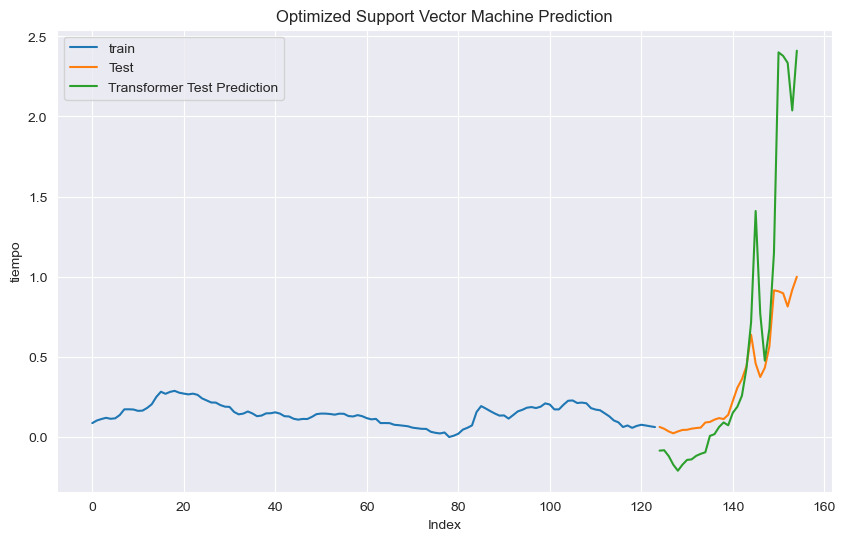

In [ ]:
import seaborn as sns 
# Graficar los resultados
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
train_original_range = range(len(Y_train_aux))
test_range = range(len(Y_train_aux), len(Y_train_aux) + len(y_grafico))
plt.plot(train_original_range, Y_train_aux, label='train')
plt.plot(test_range, y_grafico, label='Test')
plt.plot(test_range, results, label='Transformer Test Prediction')
plt.title('Optimized Support Vector Machine Prediction')
plt.xlabel('Index')
plt.ylabel('tiempo')
plt.legend()
plt.show()

In [ ]:
best_params

{'batch_size': 128,
 'dropout': 0.42431109331839173,
 'epochs': 5,
 'ff_dim': 256,
 'head_size': 64,
 'learning_rate': 4.283656011946714e-05,
 'num_heads': 6}